In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns

In [2]:
data = pd.read_csv('n90pol.csv')

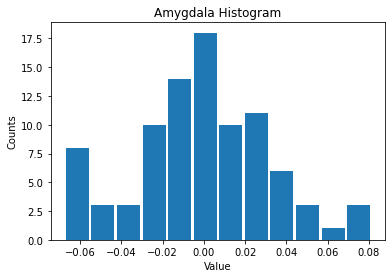

In [3]:
# Form one-dimensional histogram and KDE for amygdala and acc columns
# Amygdala histogram
plt.hist(data.iloc[:,0].to_numpy(), bins=12, alpha=1, rwidth=0.9)
plt.xlabel('Value')
plt.ylabel('Counts')
plt.title('Amygdala Histogram')
plt.show()

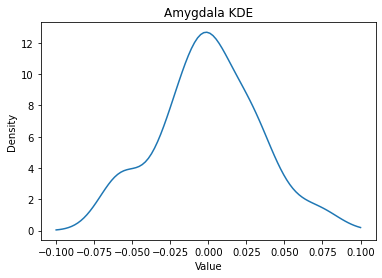

In [4]:
# Amygdala KDE
kernel = scipy.stats.gaussian_kde(data['amygdala'], bw_method = 0.4)
x = np.linspace(-0.1,0.1,100)
plt.plot(x,kernel(x))
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Amygdala KDE')
plt.show()

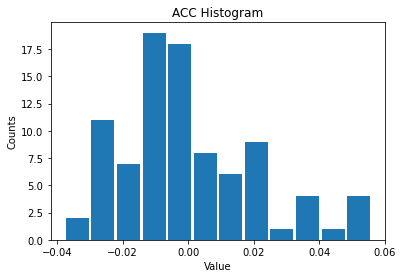

In [5]:
# ACC histogram
plt.hist(data.iloc[:,1].to_numpy(), bins=12, alpha=1, rwidth=0.9)
plt.xlabel('Value')
plt.ylabel('Counts')
plt.title('ACC Histogram')
plt.show()

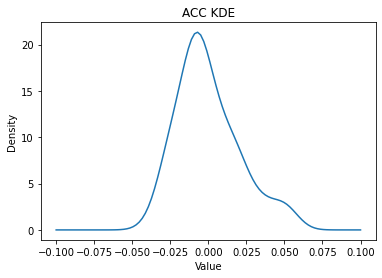

In [6]:
# ACC KDE
kernel = scipy.stats.gaussian_kde(data['acc'], bw_method = 0.4)
x = np.linspace(-0.1,0.1,100)
plt.plot(x,kernel(x))
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('ACC KDE')
plt.show()

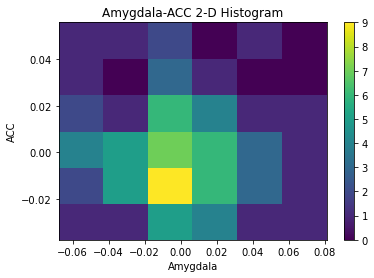

In [7]:
# 2-D Histogram
plt.hist2d(data['amygdala'], data['acc'], bins=[6,6])
plt.xlabel('Amygdala')
plt.ylabel('ACC')
plt.colorbar()
plt.title('Amygdala-ACC 2-D Histogram')
plt.show()

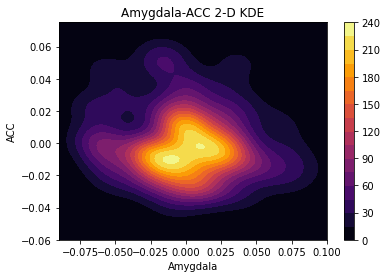

In [8]:
# 2-D KDE
xx, yy = np.mgrid[-0.09:0.1:100j, -0.06:0.075:100j]
coords = np.vstack([xx.ravel(),yy.ravel()])
vals = np.vstack([data['amygdala'], data['acc']])
kernel = scipy.stats.gaussian_kde(vals, bw_method = 0.4)
density = np.reshape(kernel(coords).T, xx.shape)
plt.contourf(xx, yy, density, levels = 20, cmap='inferno')
plt.xlabel('Amygdala')
plt.ylabel('ACC')
plt.colorbar()
plt.title('Amygdala-ACC 2-D KDE')
plt.show()

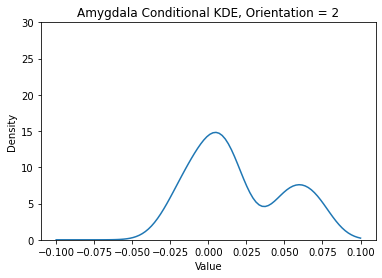

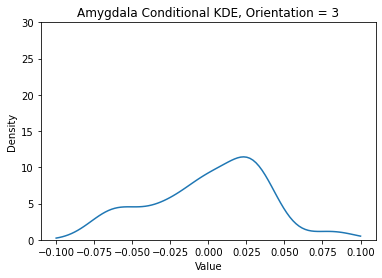

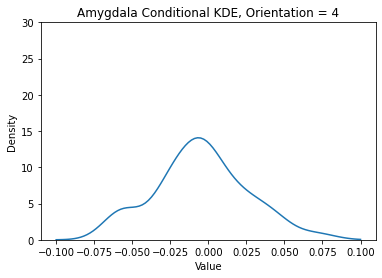

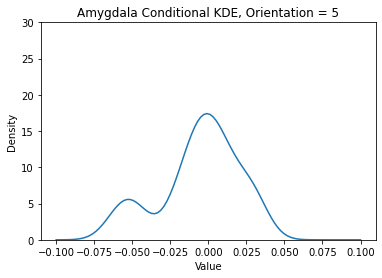

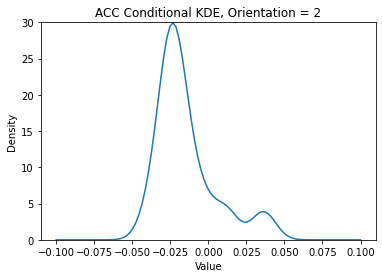

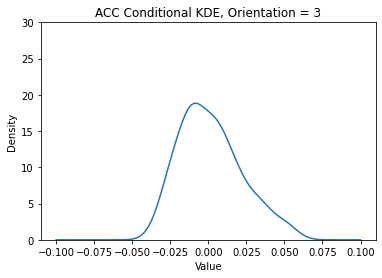

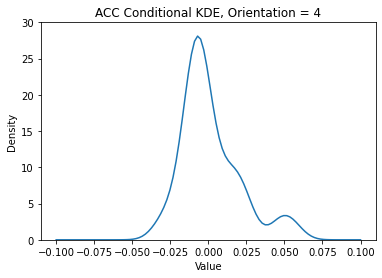

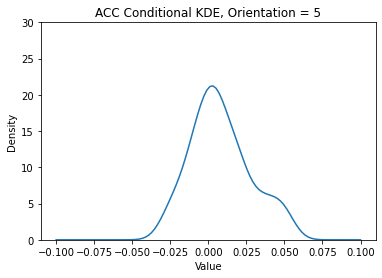

In [9]:
# Conditional distributions
# Amygdala
for c in range(2,6):
    kernel = scipy.stats.gaussian_kde(data[data['orientation'] == c]['amygdala'], bw_method = 0.4)
    x = np.linspace(-0.1,0.1,100)
    plt.plot(x,kernel(x))
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.ylim(0,30)
    plt.title('Amygdala Conditional KDE, Orientation = {}'.format(c))
    plt.show()
# ACC
for c in range(2,6):
    kernel = scipy.stats.gaussian_kde(data[data['orientation'] == c]['acc'], bw_method = 0.4)
    x = np.linspace(-0.1,0.1,100)
    plt.plot(x,kernel(x))
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.ylim(0,30)
    plt.title('ACC Conditional KDE, Orientation = {}'.format(c))
    plt.show()

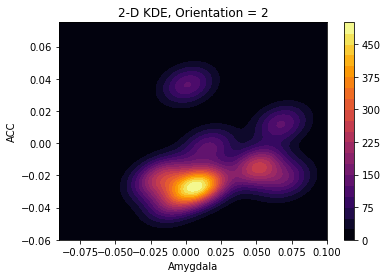

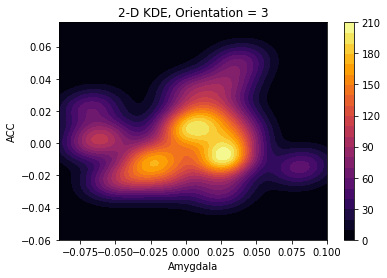

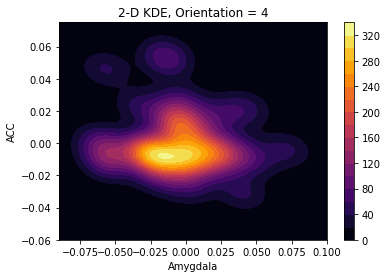

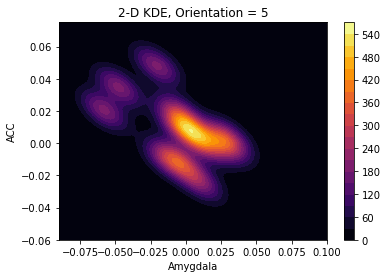

In [10]:
# Conditional joint distributions
for c in range(2,6):
    xx, yy = np.mgrid[-0.09:0.1:100j, -0.06:0.075:100j]
    coords = np.vstack([xx.ravel(),yy.ravel()])
    vals = np.vstack([data[data['orientation'] == c]['amygdala'], data[data['orientation'] == c]['acc']])
    kernel = scipy.stats.gaussian_kde(vals, bw_method = 0.4)
    density = np.reshape(kernel(coords).T, xx.shape)
    plt.contourf(xx, yy, density, levels = 20, cmap='inferno')
    plt.xlabel('Amygdala')
    plt.ylabel('ACC')
    plt.colorbar()
    plt.title('2-D KDE, Orientation = {}'.format(c))
    plt.show()